In [ ]:
# import pandas, numPy, and math plotting standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# import natural language processing cleaning libraries
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import sklearn.preprocessing as preproc

# import data preprocessing libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split
import sklearn.model_selection as modelling

# import models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Mounting Google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH = "/content/drive/My Drive/Biased Outliers/Book Study Group/Feature Engineering for Machine Learning/Restaurant_Reviews.tsv"

In [ ]:
dataset = pd.read_csv(PATH, delimiter = '\t', quoting = 3)

In [ ]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
dataset.shape

(1000, 2)

In [ ]:
# Cleaning the data 
corpus = []
for i in range(0, dataset.shape[0]):
  # Removes punctuation
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  
  # lower cases the words
  review = review.lower()

  # Split up by spaces
  review = review.split()

  # Stem the words ( leaves -> leav; leaving -> leav)
  # Remove stopped words
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # Recombining the stems into a sentence
  review = ' '.join(review)

  # Adding it into list
  corpus.append(review)                                                

In [ ]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [ ]:
from pandas.core.internals.construction import to_arrays

# tokenization of the reviews
cv = CountVectorizer(max_features = 1500) # Need to add number of columns excluding infrequent words
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

tokenization -> breaks each word into a token
- 

In [ ]:
X[0].shape

(1500,)

In [ ]:
#from pandas.core.common import random_state
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Bag of Words
X_train_bow = X_train
X_test_bow = X_test

# l2 normalization
X_train_l2 = preproc.normalize(X_train_bow, axis=0)
X_test_l2 = preproc.normalize(X_test_bow, axis=0)

# tf-idf transformed
tfidf_transform = TfidfTransformer(norm=None)
X_train_tfidf = tfidf_transform.fit_transform(X_train_bow)
X_test_tfidf = tfidf_transform.transform(X_test_bow)

In [ ]:
def unoptimized_hyperparameter_NB(X_train, y_train, X_test, y_test, description):
  # fit Naive Bayes model
  classifier = GaussianNB()
  m = classifier.fit(X_train, y_train)

  # predict using test data
  y_pred = classifier.predict(X_test)

  # accuracy score calculation
  s = accuracy_score(y_pred, y_test)

  # print score
  print('Test score with ', description, ' features ', s)

  # return model
  return m

In [ ]:
# m = unoptimized_hyperparameter_NB(X_train, y_train, X_test, y_test, description)

m1 = unoptimized_hyperparameter_NB(X_train_bow, y_train, X_test_bow, y_test, "Bag-of-Words")
m2 = unoptimized_hyperparameter_NB(X_train_l2, y_train, X_test_l2, y_test, "l2 Normalization")
m3 = unoptimized_hyperparameter_NB(X_train_tfidf.todense(), y_train, X_test_tfidf.todense(), y_test, "Tf-idf")

Test score with  Bag-of-Words  features  0.73
Test score with  l2 Normalization  features  0.705
Test score with  Tf-idf  features  0.725


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
def optimized_hyperparameter_NB(X_train, y_train, X_test, y_test, description):
  # fit Naive Bayes model
  classifier = GaussianNB()
  m = classifier.fit(X_train, y_train)

  # predict using test data
  y_pred = classifier.predict(X_test)

  # accuracy score calculation
  s = accuracy_score(y_pred, y_test)

  # print score
  print('Test score with ', description, ' features ', s)

  # return model
  return m

In [ ]:
# fit Naive Bayes model
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# predict using test data
y_pred = classifier.predict(X_test)

In [ ]:
y_pred_reshaped = y_pred.reshape(len(y_pred),1)
y_test_reshaped = y_test.reshape(len(y_test),1)
y_concatenate = np.concatenate((y_pred_reshaped, y_test_reshaped), 1)
#print(y_concatenate)

In [ ]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[55, 12],
       [42, 91]])

In [ ]:
accuracy_score(y_pred, y_test)

0.73

In [ ]:
(55+91)/(55+12+91+42)

0.73

In [ ]:
# parameter search grid to be used in GridSearchCV 
param_grid_ = { 'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]} 

bow_search = modelling.GridSearchCV(LogisticRegression(max_iter=10000), cv=5, param_grid = param_grid_)
bow_search.fit(X_train_bow, y_train)

bow_search.cv_results_

{'mean_fit_time': array([0.02430329, 0.0174017 , 0.02435002, 0.04312906, 0.08475566,
        0.12851858]),
 'mean_score_time': array([0.00114927, 0.00111523, 0.00112553, 0.00154643, 0.00115175,
        0.00151639]),
 'mean_test_score': array([0.50375, 0.58875, 0.75   , 0.76   , 0.75625, 0.74   ]),
 'param_C': masked_array(data=[1e-05, 0.001, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.001},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 10.0},
  {'C': 100.0}],
 'rank_test_score': array([6, 5, 3, 1, 2, 4], dtype=int32),
 'split0_test_score': array([0.5    , 0.54375, 0.74375, 0.74375, 0.75   , 0.74375]),
 'split1_test_score': array([0.5   , 0.55  , 0.725 , 0.7625, 0.7625, 0.7375]),
 'split2_test_score': array([0.50625, 0.60625, 0.7625 , 0.775  , 0.775  , 0.7375 ]),
 'split3_test_score': array([0.50625, 0.63125, 0.75   , 0.74375, 0.725  , 0.725  ]),
 'split4_test_score':

In [ ]:
tfidf_search = modelling.GridSearchCV(LogisticRegression(max_iter=10000), cv=5, param_grid = param_grid_)
tfidf_search.fit(X_train_tfidf, y_train)

l2_search = modelling.GridSearchCV(LogisticRegression(max_iter=10000), cv=5, param_grid = param_grid_)
l2_search.fit(X_train_l2, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [ ]:
# visualize classifier difference
search_results = pd.DataFrame.from_dict({
    'bow' : bow_search.cv_results_["mean_test_score"],
    'tfidf': tfidf_search.cv_results_["mean_test_score"],
    'l2': l2_search.cv_results_["mean_test_score"]
})

Text(0.5, 1.0, 'Optimized Parameter Comparison 3 Models')

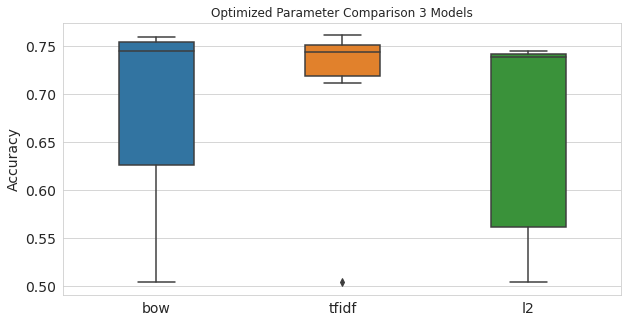

In [ ]:
# boxplot - optimized - Bag-of-Words, l2, and Tf-idf
plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=search_results, width=0.4)
ax.set_ylabel("Accuracy", size=14)
ax.tick_params(labelsize=14)
plt.title("Optimized Parameter Comparison 3 Models");

In [ ]:
def optimized_hyperparameter_LogReg(X_train, y_train, X_test, y_test, description, best_param):
  # fit Naive Bayes model
  classifier = LogisticRegression(C=best_param, max_iter=10000)
  m = classifier.fit(X_train, y_train)

  # predict using test data
  y_pred = classifier.predict(X_test)

  # accuracy score calculation
  s = accuracy_score(y_pred, y_test)

  # print score
  print('Test score with ', description, ' features ', s)

  # return model
  return m

In [ ]:
# optimized_hyperparameter_LogReg(X_train, y_train, X_test, y_test, description, best_params) - Logistic Regression
m1 = optimized_hyperparameter_LogReg(X_train_bow, y_train, X_test_bow, y_test, "Bag-of-Words", bow_search.best_params_['C'] )
m2 = optimized_hyperparameter_LogReg(X_train_l2, y_train, X_test_l2, y_test, "l2 Normalization",  l2_search.best_params_['C'] )
m3 = optimized_hyperparameter_LogReg(X_train_tfidf.todense(), y_train, X_test_tfidf.todense(), y_test, "Tf-idf", tfidf_search.best_params_['C'] )

Test score with  Bag-of-Words  features  0.71
Test score with  l2 Normalization  features  0.755
Test score with  Tf-idf  features  0.745


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
